In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__) # check tensorflow version

2.12.0


# 1. Load data

In [3]:
# Load the Fashion-MNIST dataset
fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
# Show data shape
print("Train images shape ", train_images.shape)
print("Test images shape ", test_images.shape)

Train images shape  (60000, 28, 28)
Test images shape  (10000, 28, 28)


In [5]:
# Lets check the labels
print(" We have the following unique labels ", set(train_labels) )

 We have the following unique labels  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [6]:
# Lets finds the names from the website https://keras.io/api/datasets/fashion_mnist/
labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

# 2. Let's apply a min-max scaling

In [7]:
# each picture only has one chanel, ranging from 0 to n
train_images = train_images / 255
test_images = test_images / 255

# 3. Let's plot one image

In [8]:
labels[train_labels[0]]

'Ankle boot'

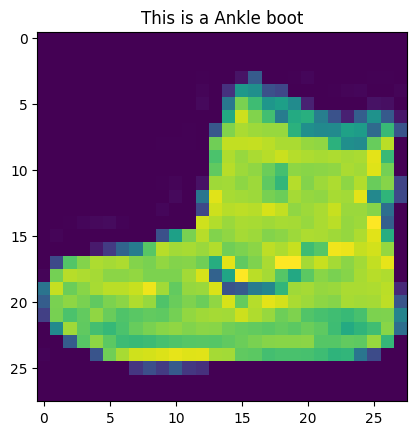

In [9]:
import matplotlib.pyplot as plt
plt.imshow(train_images[0])
plt.title(f"This is a {labels[train_labels[0]]}")
plt.show()

# 4. Let's build the model

In [31]:
# Let's start by using a 2D conv  kernel (3x3) with 16 channels using a relu activation
# Following a MaxPooling (3x3)
# And a fully connected layers of 10 neurons i.e. 1 for each predicted label using a softmax for vales between 0 and 1

# CNN example here https://www.tensorflow.org/tutorials/images/cnn

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
i = 28
model = Sequential([
    Conv2D(16, (6,6), activation='relu', input_shape=(i,i,1)),
    MaxPooling2D((3,3)),
    Flatten(),
    Dense(10, activation='softmax')
])

# 5. Le's print out the model summary

In [15]:
(3*3 + 1)*16


160

In [32]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 23, 23, 16)        592       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                7850      
                                                                 
Total params: 8,442
Trainable params: 8,442
Non-trainable params: 0
_________________________________________________________________


# 6. Let's compile the model

In [33]:
from tensorflow.python.ops import losses
# Since we have a multiclass problem we need to use a suitable loss function. In this case we choose **sparse_categorical_crossentropy**.
# Check more info here https://www.tensorflow.org/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy
# Case we had hot hot encoded our outputs, like we did in the MNIST dataset we would use **categorical_crossentropy**
# Check more info here https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# 7. Fit the model

In [34]:
result = model.fit(train_images[:10000], train_labels[:10000], epochs=10, batch_size=100, validation_split=0.1)

Epoch 1/10
90/90 [==============================] - 5s 44ms/step - loss: 1.2313 - accuracy: 0.6206 - val_loss: 0.7415 - val_accuracy: 0.7350
Epoch 2/10
90/90 [==============================] - 5s 59ms/step - loss: 0.6635 - accuracy: 0.7620 - val_loss: 0.6298 - val_accuracy: 0.7590
Epoch 3/10
90/90 [==============================] - 4s 41ms/step - loss: 0.5850 - accuracy: 0.7859 - val_loss: 0.6198 - val_accuracy: 0.7560
Epoch 4/10
90/90 [==============================] - 4s 42ms/step - loss: 0.5341 - accuracy: 0.8070 - val_loss: 0.5383 - val_accuracy: 0.8030
Epoch 5/10
90/90 [==============================] - 5s 60ms/step - loss: 0.4969 - accuracy: 0.8169 - val_loss: 0.5142 - val_accuracy: 0.8120
Epoch 6/10
90/90 [==============================] - 4s 42ms/step - loss: 0.4673 - accuracy: 0.8341 - val_loss: 0.4890 - val_accuracy: 0.8170
Epoch 7/10
90/90 [==============================] - 4s 43ms/step - loss: 0.4522 - accuracy: 0.8384 - val_loss: 0.4859 - val_accuracy: 0.8180
Epoch 8/10
90

In [35]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 3s 8ms/step - loss: 0.4601 - accuracy: 0.8331


[0.4601283669471741, 0.8331000208854675]

# 8. Let's add more layers

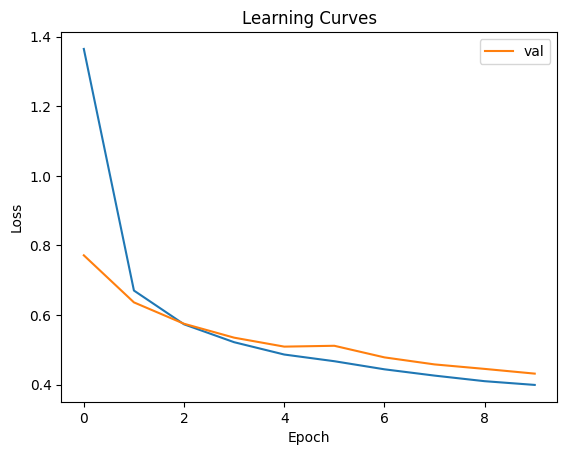

In [18]:
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(result.epoch, result.history["loss"])
plt.plot(result.history['val_loss'], label='val')
plt.legend()

# 9. Vizualize layers

In [19]:
# running model.layers it is possible to access all the internal layers of the model
model.layers

In [20]:
# to capture the weights we do
conv1_filters, conv1_biases = model.layers[0].get_weights()

In [21]:
conv1_filters.shape

(3, 3, 1, 16)

In [22]:
# lets normalize filters
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = conv1_filters.min(), conv1_filters.max()
conv1_filters = (conv1_filters - f_min) / (f_max - f_min)

In [23]:
conv1_filters[:,:,:,1][:,:,0].shape

(3, 3)

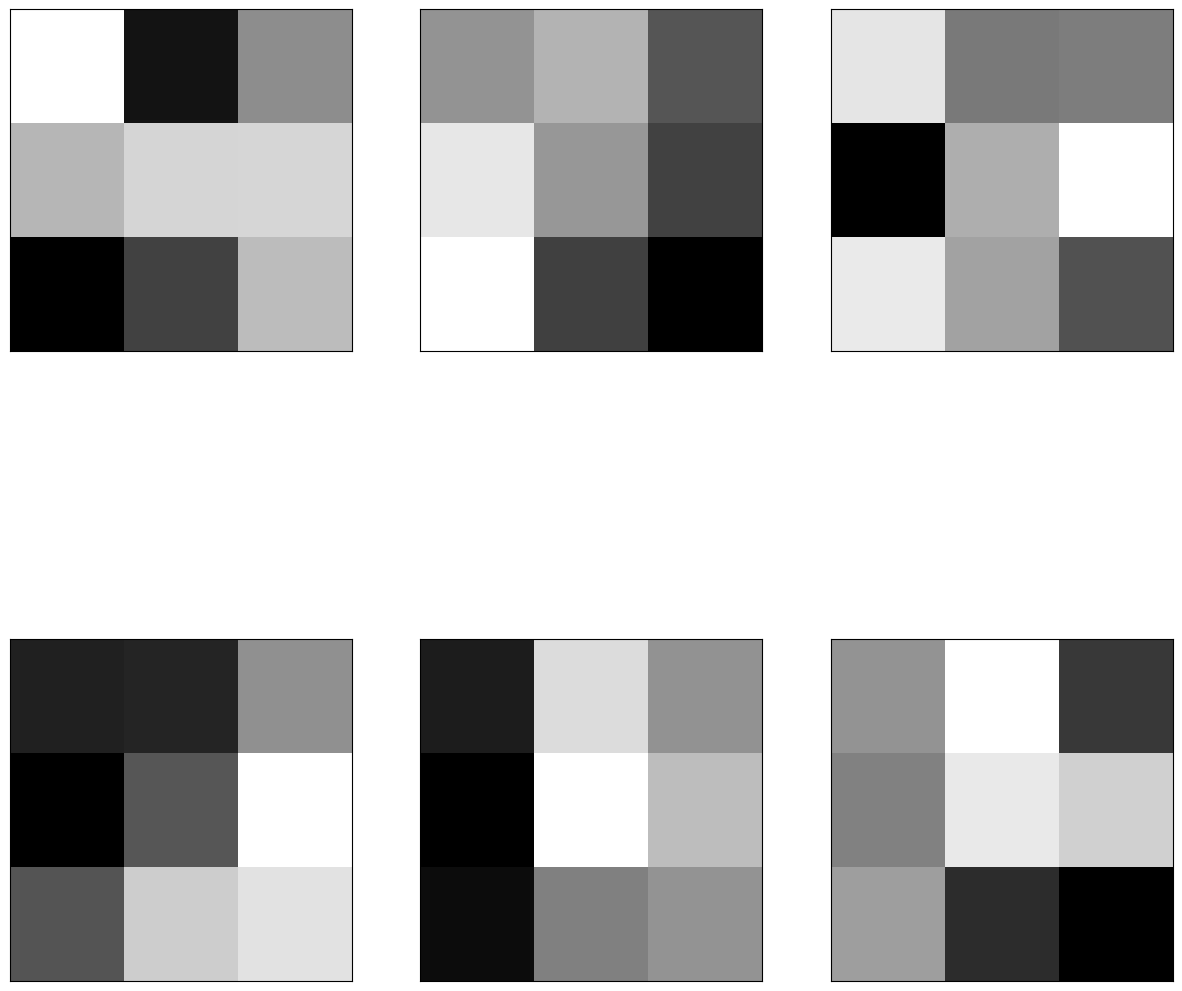

In [24]:
import matplotlib.pyplot as plt
# plot first 6 filters
n_filters, ix = 6, 1
fig, ax = plt.subplots(2, 3, figsize=(15,15))
axs = ax.flat
for i in range(n_filters):
    # get the filter
    f = conv1_filters[:, :, :, i]
    # plot each channel separately
    # specify subplot and turn of axis

    axs[i].set_xticks([])
    axs[i].set_yticks([])
    # plot filter channel in grayscale
    axs[i].imshow(f[:,:,0], cmap='gray')
    ix += 1
# show the figure
plt.show()

In [ ]:
model.layers

# 10. Let's create a bigger filter
